# **ANALYSIS OF START-UP FUNDING TRENDS IN THE INDIAN ECOSYSTEM**

**DESCRIPTION**
The Indian ecosystem is dynamic and constantly evolving, thus, for every business venturing into an unknown territory i.e., a new country or landscape, the fear of the unknown normally takes precedence with regards to whether the business will succeed or not. By examining existing data spanning from 2018 to 2021 on start-up funding, this project will identify key patterns, investment behaviors, and emerging sectors within the Indian start-up ecosystem to inform strategic decision-making for venturing into this market.


**HYPOTHESIS**
- Null Hypothesis (H0) – The funds a company receives does not depend on the sector the company invests in. 


- Alternative Hypothesis (H1) – The funds a company receives depends on the sector a company invests in. 


**BUSINESS QUESTIONS**

1.Does the location of a start-up influence/determine the sector?  

2.Which industries have received the most funding in each year, and how has this distribution changed over time?  

3.What is the distribution of funding amounts among start-ups (e.g., average, median, and range) each year?  

4.What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year?  

5.How does funding vary within the various geographical locations for start-ups? 

 




# **1.0 DATA UNDERSTANDING AND DATA EXPLORATION**

In [2227]:
%pip install pyodbc



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2228]:
# Load libraries
# Database connnection
import pyodbc     
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



import scipy.stats as stats
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import re

# filter warnings
import warnings 
warnings.filterwarnings('ignore')

1.1 LOADING OF DATA

LOADING FROM DATABASE


In [2229]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")

In [2230]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

#use the connect method using pyodbc to connect
connection = pyodbc.connect(connection_string)

In [2231]:
# sql query to get 2020 data. 
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

# sql query to get 2021 data. 
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

In [2232]:
# load 2021 data
data_2021=pd.read_sql(query_2021,connection)

    # load 2020 data
data_2020=pd.read_sql(query_2020,connection)

In [2233]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [2234]:
# Saving the DataFrame to a CSV file
data_2020.to_csv('datasets/startup_funding2020.csv', index=False)


In [2235]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [2236]:
# Saving the DataFrame to a CSV file
data_2021.to_csv('datasets/startup_funding2021.csv', index=False)


LOADING CSV FILES

In [2237]:

    # load 2018 data
data_2018= pd.read_csv('datasets\startup_funding2018.csv')

data_2018.head()


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [2238]:
# load 2019 data
data_2019=pd.read_csv('datasets\startup_funding2019.csv')

data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


## **2.0  EXPLORATORY DATA ANALYSIS (EDA)**

# **2.1. 2018 DATASET EDA**

In [2239]:
# preview the rows and columns for the 2018 dataset
data_2018.sample(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
240,Log 9 Materials,Nanotechnology,Seed,"₹30,000,000","Uttar Pradesh, India, Asia",Log 9 Materials is a nano-materials manufactur...
63,Sattviko,"Food Processing, Retail",Angel,—,"New Delhi, Delhi, India",Sattviko fosters wellness and shares Indiannes...
203,Tricog Health Services Pvt Ltd,"Health Care, Health Diagnostics, Predictive An...",Series A,4000000,"Bangalore, Karnataka, India",Predictive Healthcare Analytics Company
150,Tabono,Sports,Seed,—,"Gurgaon, Haryana, India",Tabono is a one stop environment for all your ...
342,Charcoal Eats,Food Processing,Seed,"₹50,000,000","Mumbai, Maharashtra, India",Charcoal Eats aims to bring Dominos style stan...


In [2240]:
# checking for number of columns and rows
print (data_2018.shape)
print(f"There are {data_2018.shape[0]} rows, and {data_2018.shape[1]} columns")

(526, 6)
There are 526 rows, and 6 columns


In [2241]:
# checking for duplicates
print("There are ",data_2018.duplicated().sum(),"duplicate(s)")

There are  1 duplicate(s)


In [2242]:
# Checking for missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [2243]:
# checking info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [2244]:
# checking for the various column headers
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [2245]:
# Performing describtive analysis on the data
data_2018.describe(include='all').T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


 **OBSERVATIONS FROM 2018 DATA**

- The Seed series stage was the most funded or preferred

- The most preferred location for startups was Bangalore

- The company named TheCollegeFever was the most popular startup in 2018

# **2.2. 2019 DATA EDA**


In [2246]:
# get a sample of 2019 dataset
data_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
42,Bombay Shirt Company,2012.0,Mumbai,E-commerce,Online custom shirt brand,Akshay Narvekar,Lightbox Ventures,"$8,000,000",NaN
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A
40,Trell,2016.0,Bangalore,Social Media,Blogging platform that enables people to creat...,"Pulkit Agrawal, Prashant Sachan, Arun Lodhi, B...","Ruizheng Investment, Tej Kapoor, Krinshavatara...","$2,000,000",Pre series A
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B


In [2247]:
# checking for number of columns and rows
print (data_2019.shape)
print(f"There are {data_2019.shape[0]} rows, and {data_2019.shape[1]} columns")

(89, 9)
There are 89 rows, and 9 columns


In [2248]:
# checking for duplicates
print("There are ",data_2019.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [2249]:
# Checking for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [2250]:
# checking for datatypes in the different columns
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [2251]:
# checking for the various column headers
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [2252]:
# performing descriptive analysis
data_2019.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**OBSERVATIONS FROM 2019 DATA**

- The Series A series stage was the most funded or preferred

- The most preferred location for startups was Bangalore

- The company named Kratical was the most popular startup in 2019

- Most of the startups in 2019 were in the Edtech sector

# **2.3. 2020 DATA EDA**

In [2253]:
# get a sample of 2020 dataset
data_2020.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
398,Onsitego,2010.0,Mumbai,Customer service company,Onsitego is a customer service company for dev...,Kunal Mahipal,"Accel, Zodius Capital",30000000.0,Series B,None
86,Let's Dive,2020.0,Bangalore,SaaS platform,A platform for remote employee engagement and ...,"Nitesh Agrawal, Om Prakash",Surge,1700000.0,None,None
201,Janani,2020.0,Bangalore,Fertility tech,Janani aims to make the process of infertility...,Nilay Mehrotra,9Unicorns,200000.0,Pre-seed,None
250,Satyukt,2018.0,Bangalore,Agri tech,An agritech company that provides business to ...,"Sat Tomer, Yukti Gill","NABVENTURES, Social Alpha (India)",500000.0,Seed,None
1021,IncubateHub,NaN,Bengaluru,Tech hub,Provides platform for Corporates to connect es...,Rajiv Mukherjee,Venture Catalysts,NaN,None,None


In [2254]:
#checking for number of columns and rows
print (data_2020.shape)
print(f"There are {data_2020.shape[0]} rows, and {data_2020.shape[1]} columns")

(1055, 10)
There are 1055 rows, and 10 columns


In [2255]:
# checking for duplicates
print("There are ",data_2020.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [2256]:
# Checking for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [2257]:
# checking for datatypes in the different columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [2258]:
# checking for the various column headers
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [2259]:
# perform describtive analysis on the 2020 data
data_2020.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**OBSERVATIONS FROM 2020 DATA**

- The Series A series stage was the most funded or preferred

- The most preferred location for startups was Bangalore

- The company named Nykaa was the most popular startup in 2020

- Most of the startups in 2020 were in the Fintech sector

- The average amount invested was about $113,042,969

# **2.4. 2021 DATA EDA**

In [2260]:
# get a sample of 2021 dataset
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A
181,Stellaris Venture Partners,2015.0,Bangalore,Venture Capital,Early-stage tech VC in India.,"Ritesh Banglani, Alok Goyal, Rahul Chowdhri",None,$225000000,None
489,Mamaearth,2016.0,Gurugram,Healthcare,A brand which develops products from world-cla...,"Varun Alagh, Ghazal Alagh",Sofina Ventures SA,$50000000,None
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
590,Biocraft Innovation Technology,2019.0,Noida,Environmental service,Innovation startup developing bamboo resources...,"Vibha Mittal, Anubhav Mittal",JITO Angel Network,$undisclosed,Pre-seed


In [2261]:
# get the number of rows and columns for the datasets
print(f'{data_2021.shape}')

print(f"The 2021 dataset has {data_2021.shape[0]} rows and {data_2021.shape[1]} Columns")

(1209, 9)
The 2021 dataset has 1209 rows and 9 Columns


In [2262]:
# checking for duplicates
print("There are ",data_2021.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [2263]:
#  Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [2264]:
# checking for datatypes in the different columns
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [2265]:
# checking for the various column headers
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [2266]:
# performing describtive analysis on the dataset
data_2021.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**OBSERVATIONS FROM 2021 DATA**

- The Seed series stage was the most funded or preferred

- The most preferred location for startups was Bangalore

- The company named BharatPe was the most popular startup in 2021

- Most of the startups in 2021 were in the Fintech sector



**GENERAL OBSERVATIONS FROM DATA**


**Issues Observed**

1. The 2018 dataset has some missing columns which is making the representation of the data incomplete

2. The naming conventions of columns in 2018 and 2019 datasets compared to 2020 and 2021 datasets does not tally

3. The 2020 dataset contains an additional column that appears to serve no meaningful purpose in our dataset or analysis

4. The currencies are all not uniform with some in rupees and others in dollars especially in the 2018 dataset

5. names of the cities in some of the datasets are not spelt correctly bringing about a variation 

6. The stages of funding are not well defined which might affect our analysis



**Remedies to issues Observed**
1. To address the 2018 dataset with some missing columns, we will employ data engineering techniques to populate and create those columns ensuring a commprehensive data structure for our analysis.

2. To enure a seamless data integration and analysis ,we will establish uniformity and coherence across all datasets by embarking on a column renaming process to allign all the columns in the dataset

3. The redundant columns observed in the 2020 dataset will be removed so that any unnecessary elements does not interfere with our analysis

4. All currencies will be converted to dollars for uniformity.Thereby the exchange rate for each of the years will be applied if necessary.

5. A thorough cleaning of the names of the cities will be done to ensure a more accurate dataset to be used for our analysis. 

6. Research will be done in order to group the current stages in our datasets under main stages to make our analysis more understandable.

# **3.0 DATA CLEANING**

**3.1. Converting Indian Rupees to Dollars in 2018 dataset**

In [2267]:
# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '', regex=False).str.replace(',', '').astype(float) * 0.0146

In [2268]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [2269]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


## **Add year data was collected**

- There is need to add a column that represents the year each dataset was collected. This will help with handling the datasets after merging the dataframes 

In [2270]:
# add year when data was collected column to every dataset
data_2018['year'] = pd.to_datetime('2018', format='%Y').year
data_2019['year'] = pd.to_datetime('2019', format='%Y').year
data_2020['year'] = pd.to_datetime('2020', format='%Y').year
data_2021['year'] = pd.to_datetime('2021', format='%Y').year

In [2271]:
# renaming columns to make them consistent across dataframes
data_2021 = data_2021.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'stage', 'year' : 'year'})
data_2020 = data_2020.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'stage','year' : 'year'})
data_2019 = data_2019.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'stage','year' : 'year'})
data_2018 = data_2018.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'stage','year' : 'year'})

3.1 CLEANING SOME KEY COLUMNS IN 2018 DATAFRAME

In [2272]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   about_company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [2273]:
# This is to see the entries that have been in the column 'Round/Series'
unique_values = data_2018["stage"].unique()
unique_values

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [2274]:
# Search the Row with the hyperlink to check if it is not a misplaced data entry in that row.
search_string = 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
result = data_2018[data_2018['stage'].str.contains(search_string)]

result

,company_brand,sector,stage,amount,headquarter,about_company,year
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...,2018


In [2275]:
# Replace the stage value in row 178 with Seed which was researched online
data_2018.loc[178, 'stage'] ="Seed"

In [2276]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   about_company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


 *the remaining cleaning of the other columns will be done after concatenating all dataframes*

3.2 CLEANING SOME KEY COLUMNS IN 2019 DATAFRAME

In [2277]:
# this is to check how many unique values are in each column.

unique_values = data_2019.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: company_brand, Unique values: 87
Column: founded, Unique values: 12
Column: headquarter, Unique values: 17
Column: sector, Unique values: 52
Column: about_company, Unique values: 88
Column: founders, Unique values: 85
Column: investor, Unique values: 86
Column: amount, Unique values: 50
Column: stage, Unique values: 15
Column: year, Unique values: 1


Cleaning of Founded column of 2019

Key issues identified

* Dealing with missing values
* Conversion of Float to string.

Aprroach to Clean the column

A research was done online (Crunchbase) by using the company name, to discover when the companies with the missing founded values were established to fill them appropriately. Also, the data type was changed from a float to a string to enable us to call it by the founded year during analysis.

In [2278]:
unique_values = data_2019['founded'].unique()
unique_values

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [2279]:
# Changing float(decimal) datatype to int64(integers)
data_2019['founded'] = data_2019['founded'].astype('Int64')

data_2019

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
0,Bombay Shaving,<NA>,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,<NA>,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,<NA>,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [2280]:
# filling null values in Founded column with year gotten from internet

data_2019.iloc[0,1]=2015

data_2019.iloc[2,1]=2014

data_2019.iloc[5,1]=2017

data_2019.iloc[6,1]=2015

data_2019.iloc[8,1]=2013

data_2019.iloc[11,1]=2006

data_2019.iloc[14,1]=2019

data_2019.iloc[27,1]=2016

data_2019.iloc[30,1]=2015

data_2019.iloc[31,1]=2016

data_2019.iloc[37,1]=2017

data_2019.iloc[39,1]=2018

data_2019.iloc[41,1]=2017

data_2019.iloc[42,1]=2012

data_2019.iloc[44,1]=2019

data_2019.iloc[45,1]=2015

data_2019.iloc[46,1]=2018

data_2019.iloc[47,1]=2010

data_2019.iloc[56,1]=2015

data_2019.iloc[57,1]=2015

data_2019.iloc[59,1]=2018

data_2019.iloc[62,1]=2013

data_2019.iloc[63,1]=2018

data_2019.iloc[64,1]=2016

data_2019.iloc[71,1]=2007

data_2019.iloc[77,1]=2016

data_2019.iloc[82,1]=2013

data_2019.iloc[83,1]=2016

data_2019.iloc[84,1]=2016

data_2019.iloc[88,1]=1994


In [2281]:
# Changing int64 datatype to object
data_2019['founded'] = data_2019['founded'].astype('string')

cleaning of Headquarters column of 2019

Key issues identified

* Dealing with missing values


Aprroach to Clean the column

A research was done online (Crunchbase) by using the company name, to discover the headquarters. 

In [2282]:
unique_values = data_2019['headquarter'].unique()
unique_values

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [2283]:
# filling null values in HeadQuarter column 

data_2019.iloc[0,2]='New Delhi'

data_2019.iloc[8,2]='Mumbai'

data_2019.iloc[14,2]='Mumbai'

data_2019.iloc[16,2]='Bangalore'

data_2019.iloc[18,2]='Mumbai'

data_2019.iloc[20,2]='London'

data_2019.iloc[21,2]='Gurugram'

data_2019.iloc[22,2]='San Franscisco'

data_2019.iloc[27,2]='San Franscisco'

data_2019.iloc[29,2]='Gurugram'

data_2019.iloc[31,2]='Haryana'

data_2019.iloc[34,2]='Gurgaon'

data_2019.iloc[41,2]='Haryana'

data_2019.iloc[43,2]='California'

data_2019.iloc[54,2]='Karnataka '

data_2019.iloc[65,2]='New Delhi'

data_2019.iloc[70,2]='Chennai'

data_2019.iloc[76,2]='Bangalore'

data_2019.iloc[79,2]='Bangalore'

Cleaning of 'Sector' column of 2019

Key issues identified

* Dealing with missing values

Aprroach to Clean the column

A research was done online (Crunchbase) by using the Company name, to determine the Sectors to populate the missing values as well.

In [2284]:
unique_values = data_2019['sector'].unique()
unique_values

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [2285]:
# filling null values in Sector column 

data_2019.iloc[41,3]='App Development'

data_2019.iloc[49,3]='Outsourcing'

data_2019.iloc[52,3]='Management consulting'

data_2019.iloc[56,3]='Fintech'

data_2019.iloc[57,3]='Telecom'

Cleaning of 'about company' column of 2019

Key issues identified

* Dealing with non-printable characters/unicodes.

Aprroach to Clean the column

We grabbed the unicodes and replaced them with empty string.

In [2286]:
# has non-printable characters that must be taken out
unique_values = data_2019['about_company'].unique() 
unique_values

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.',
       'Provides interior designing solutions',
       'It is a seed company engaged in production, processing and marketing of seeds',
       'A drone automation platform',
       'It builds software products that makes work simpler, pleasant, and productive',
       'It is a product-based cybersecurity solutions provider',
       'It is an AI and big data services company providing business solutions.',
       'It is a eyewear company',
       'A B2C\xa0\xa0brand that focusses on premium and comfortable merchandise for Generation Alpha – kids',
       'It is a self-healing enterprise, the IT operations software detects, predicts and prevents problems before they happen',
       'Platform that provides complete financial solutions for excluded individuals 

In [2287]:
# Clean the 'about_company' column by removing '\xa0'
data_2019['about_company'] = data_2019['about_company'].str.replace('\xa0', '') # this is to remove the '\xa0' from the entries

Cleaning of 'Stage' column of 2019

Key issues identified

   * Dealing with missing values

Aprroach to Clean the column

A research was done online (Crunchbase) by using the Company name, to determine the Stage to populate the missing values as well.

In [2288]:
unique_values = data_2019["stage"].unique()
unique_values

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [2289]:
# filling null values in Stage column 

data_2019.iloc[0,8]='Series C'

data_2019.iloc[4,8]='Seed'

data_2019.iloc[5,8]='Seed'

data_2019.iloc[6,8]='Seed'

data_2019.iloc[10,8]='Seed'

data_2019.iloc[11,8]='Series B'

data_2019.iloc[13,8]='Seed'

data_2019.iloc[14,8]='Series B'

data_2019.iloc[15,8]='Debt'

data_2019.iloc[16,8]='Debt'

data_2019.iloc[18,8]='Seed'

data_2019.iloc[20,8]='Venture round'

data_2019.iloc[23,8]='Unknown'

data_2019.iloc[24,8]='Debt'

data_2019.iloc[27,8]='Series A'

data_2019.iloc[31,8]='Angel'

data_2019.iloc[32,8]='Grant'

data_2019.iloc[33,8]='Corporate round'

data_2019.iloc[39,8]='Seed'

data_2019.iloc[41,8]='Corporate round'

data_2019.iloc[42,8]='Venture round'

data_2019.iloc[43,8]='Series A'

data_2019.iloc[44,8]='Angel'

data_2019.iloc[45,8]='Seed'

data_2019.iloc[48,8]='Secondary market'

data_2019.iloc[54,8]='Series D'

data_2019.iloc[55,8]='Seed'

data_2019.iloc[58,8]='Debt'

data_2019.iloc[59,8]='Angel'

data_2019.iloc[60,8]='Venture round'

data_2019.iloc[61,8]='Debt'

data_2019.iloc[62,8]='Seed'

data_2019.iloc[63,8]='Series C'

data_2019.iloc[66,8]='Seed'

data_2019.iloc[67,8]='Venture round'

data_2019.iloc[69,8]='Seed'

data_2019.iloc[71,8]='Unknown'

data_2019.iloc[74,8]='Debt'

data_2019.iloc[76,8]='Series B'

data_2019.iloc[77,8]='Corporate round'

data_2019.iloc[79,8]='Series C'

data_2019.iloc[80,8]='Series J'

data_2019.iloc[81,8]='Debt'

data_2019.iloc[85,8]='Secondary market'

data_2019.iloc[87,8]='Angel'

data_2019.iloc[88,8]='Series F'


In [2290]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  89 non-null     object
 1   founded        89 non-null     string
 2   headquarter    89 non-null     object
 3   sector         89 non-null     object
 4   about_company  89 non-null     object
 5   founders       86 non-null     object
 6   investor       89 non-null     object
 7   amount         89 non-null     object
 8   stage          89 non-null     object
 9   year           89 non-null     int64 
dtypes: int64(1), object(8), string(1)
memory usage: 7.1+ KB


*the remaining cleaning of the other columns will be done after concatenating all dataframes*

3.4 CLEANING SOME KEY COLUMNS IN 2020 DATAFRAME

In [2291]:
# this is to check how many unique values are in each column

unique_values = data_2020.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: company_brand, Unique values: 905
Column: founded, Unique values: 26
Column: headquarter, Unique values: 77
Column: sector, Unique values: 302
Column: about_company, Unique values: 990
Column: founders, Unique values: 927
Column: investor, Unique values: 848
Column: amount, Unique values: 300
Column: stage, Unique values: 42
Column: column10, Unique values: 2
Column: year, Unique values: 1


In [2292]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   about_company  1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [2293]:
# Dropping column10 as it contained nothing relevant to our work
columns_to_drop = ['column10']
data_2020 = data_2020.drop(columns_to_drop, axis=1)

*Cleaning founded column

changing datatype to string

In [2294]:
# changing datatype to string from float64 to help us call it for analysis
data_2020['founded'] = data_2020['founded'].astype('string')

In [2295]:
# Converting the amount column to numeric

data_2020["amount"] = pd.to_numeric(data_2020["amount"], errors="coerce")

In [2296]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    string 
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   about_company  1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
 9   year           1055 non-null   int64  
dtypes: float64(1), int64(1), object(7), string(1)
memory usage: 82.6+ KB


3.5 CLEANING SOME KEY COLUMNS IN 2021 DATAFRAME

In [2297]:
# this is to check how many unique values are in each column
unique_values = data_2021.nunique()

for column, count in unique_values.items():
    print(f"Column: {column}, Unique values: {count}")

Column: company_brand, Unique values: 1033
Column: founded, Unique values: 30
Column: headquarter, Unique values: 70
Column: sector, Unique values: 254
Column: about_company, Unique values: 1143
Column: founders, Unique values: 1095
Column: investor, Unique values: 937
Column: amount, Unique values: 278
Column: stage, Unique values: 31
Column: year, Unique values: 1


Cleaning of 'HeadQuarter' column of 2021

Key issues identified

* There were non printable characters/unicodes
* Some entries in this column were supposed to be in other columns

Aprroach to Clean the column

We grabbed the unicodes and replaced them with empty strings and viewed the rows with misleading values which were then placed in it's right column. 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References are attached. 

In [2298]:
# Clean the 'HeadQuarter' column by removing '\t#ref!'
data_2021['headquarter'] = data_2021['headquarter'].str.replace('\t#ref!', '') 

# Display the updated DataFrame
data_2021['headquarter']

0       Bangalore
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
1204     Gurugram
1205    New Delhi
1206    Bangalore
1207     Gurugram
1208    Bangalore
Name: headquarter, Length: 1209, dtype: object

In [2299]:
# this is to view and correct the row for all the values in the headquarter that have misleading values

data_2021['headquarter'] = data_2021['headquarter'].fillna('').astype(str)
search_string = 'Information Technology & Services'
result = data_2021[data_2021['headquarter'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C,2021


In [2300]:
# this is to reorder the entries in row 1176
Sector=data_2021.loc[1176, 'headquarter']
data_2021.loc[1176, 'headquarter'] = data_2021.loc[1176, 'sector']
data_2021.loc[1176, 'sector']=Sector 

In [2301]:
# this is to search the row with Computer games 
search_string = 'Computer Games'
result = data_2021[data_2021['headquarter'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [2302]:
# this is to reorder the entries in row 98 and the stage found online is placed at the right place
investor = data_2021.loc[98, 'amount']
data_2021.loc[98, 'amount'] = data_2021.loc[98, 'stage']
data_2021.loc[98, 'investor']=investor
data_2021.loc[98, 'founders'] = data_2021.loc[98, 'investor']
data_2021.loc[98, 'headquarter']= " Bangalore"
data_2021.loc[98, 'stage']= " Series A"

Reference:

https://www.linkedin.com/company/fanplay-iot/?originalSubdomain=in

https://www.crunchbase.com/organization/fanplay-technologies

In [2303]:
# this is to search the row with Food and Beverages 
data_2021['headquarter'] = data_2021['headquarter'].fillna('').astype(str)
search_string = 'Food & Beverages'
result = data_2021[data_2021['headquarter'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021


In [2304]:
# this is to reorder the entries in row 241 and the Headquarter found online is placed at the right place
headQ=data_2021.loc[241, 'sector']
data_2021.loc[241, 'sector'] = data_2021.loc[241, 'headquarter']
data_2021.loc[241, 'headquarter']="New Delhi"

In [2305]:
# this is to reorder the entries in row 255 and the Headquarter found online is placed at the right place
headQ=data_2021.loc[255, 'sector']
data_2021.loc[255, 'sector'] = data_2021.loc[241, 'headquarter']
data_2021.loc[255, 'headquarter']="New Delhi"

Reference:

https://masterchow.in/pages/about-us

In [2306]:
# this is to search the row with Pharmaceuticals
data_2021['headquarter'] = data_2021['headquarter'].fillna('').astype(str)
search_string = 'Pharmaceuticals'
result = data_2021[data_2021['headquarter'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021


In [2307]:
# this is to reorder the entries in row 242 and the headquarter found online is placed at the right place
data_2021.loc[242, 'stage']= data_2021.loc[242, 'amount']
data_2021.loc[242, 'amount'] = data_2021.loc[242, 'investor']
data_2021.loc[242, 'investor']= data_2021.loc[242, 'founders']
data_2021.loc[242, 'founders']= data_2021.loc[242,'about_company']
data_2021.loc[242, 'about_company']= data_2021.loc[242,'sector']
data_2021.loc[242, 'sector']= data_2021.loc[242,'headquarter']
data_2021.loc[242,'headquarter']="Mumbai" 

In [2308]:
# this is to reorder the entries in row 256 and the headquarter found online is placed at the right place
data_2021.loc[256, 'stage']= data_2021.loc[256, 'amount']
data_2021.loc[256, 'amount'] = data_2021.loc[256, 'investor']
data_2021.loc[256, 'investor']= data_2021.loc[256, 'founders']
data_2021.loc[256, 'founders']= data_2021.loc[256,'about_company']
data_2021.loc[256, 'about_company']= data_2021.loc[256,'sector']
data_2021.loc[256, 'sector']= data_2021.loc[256,'headquarter']
data_2021.loc[256,'headquarter']="Mumbai" 

Reference:

https://www.crunchbase.com/organization/fullife-healthcare

In [2309]:
# this is to search the row with Online media
data_2021['headquarter'] = data_2021['headquarter'].fillna('').astype(str)
search_string = 'Online Media'
result = data_2021[data_2021['headquarter'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None,2021


In [2310]:
# this is to reorder the entries in row 1100 and the headquarter found online is placed at the right place
data_2021.loc[1100, 'amount']= data_2021.loc[1100, 'investor']
data_2021.loc[1100, 'investor'] = data_2021.loc[1100, 'founders']
data_2021.loc[1100, 'founders']= data_2021.loc[1100, 'about_company']
data_2021.loc[1100, 'about_company']= data_2021.loc[1100, 'sector']
data_2021.loc[1100, 'sector']= data_2021.loc[1100, 'headquarter']
data_2021.loc[1100, 'headquarter']=" Bangalore "

https://www.linkedin.com/company/sochcast/?originalSubdomain=in

Cleaning of 'Sector' column of 2021

Key issues identified

   * Some entries in this column were supposed to be in other columns

Aprroach to Clean the column

A research was done online by using the Company name to determine the actual information(sector) to populate the row that had such information missing. References were duly done.


In [2311]:
# to view the entries in this column
unique_values = data_2021["sector"].unique()
unique_values

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [2312]:
# Searching for the Row with the unusual Sector Name to check if it is not a misplaced data entry
search_string = "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."
result = data_2021[data_2021['sector'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,2021


In [2313]:
# this is to reorder the entries in row 257 and the sector found online is placed at the right place
data_2021.loc[257, 'stage'] = data_2021.loc[257, 'amount']
data_2021.loc[257, 'amount'] = data_2021.loc[257, 'investor']  
data_2021.loc[257, 'investor'] = data_2021.loc[257, 'founders'] 
data_2021.loc[257, 'founders'] = data_2021.loc[257, 'about_company']
data_2021.loc[257, 'about_company'] = data_2021.loc[257, 'sector']
data_2021.loc[257, 'sector']= "EV"

Reference:

https://www.moeving.com/our-company/

Cleaning of 'Investor' column of 2021

Key issues identified

* There were non printable characters/unicodes
* Some entries in this column were supposed to be in other columns

Aprroach to Clean the column

We identfied the unicodes and replaced them with empty strings and viewed the rows with misleading values which were then placed in it's right column. 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References were duly done.

In [2314]:
# this is to view the entries in this column
unique_values = data_2021["investor"].unique()
unique_values

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [2315]:
#replacing any string or unicode with an empty space
data_2021['investor'] = data_2021['investor'].replace(r'\ufeff', '', regex=True)

data_2021['investor'] = data_2021['investor'].replace(r'#REF', '', regex=True)

data_2021['investor'] = data_2021['investor'].replace(r'http://', '', regex=True)

data_2021['investor'] = data_2021['investor'].replace(r'/', '', regex=True)

data_2021['investor'] = data_2021['investor'].replace(r'\t!', '', regex=True)

In [2316]:
# Searching for the Row with unusual investor Name to check if it is not a misplaced data entry
data_2021['investor'] = data_2021['investor'].fillna('').astype(str)
search_string = "1000000"
result = data_2021[data_2021['investor'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000,Seed,None,2021


In [2317]:
# this is to reorder the entries in row 545 
data_2021.loc[545, 'stage'] = data_2021.loc[545, 'amount']
data_2021.loc[545, 'amount'] = data_2021.loc[545, 'investor'] 
data_2021.loc[1148, 'stage'] = data_2021.loc[1148, 'amount']
data_2021.loc[1148, 'amount'] = data_2021.loc[1148, 'investor'] 

In [2318]:
# Searching for the Row with unusual investor Name to check if it is not a misplaced data entry
data_2021['investor'] = data_2021['investor'].fillna('').astype(str)
search_string = "2000000"
result = data_2021[data_2021['investor'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
902,EyeMyEye,2021.0,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,$2000000,Pre-series A,2021


In [2319]:
# this is to fill the investor at row 902 with the right investor name which was found online
data_2021.loc[902, 'investor'] = "Hyderabad "

Reference for the name of the headquarter:

https://www.crunchbase.com/organization/fullife-healthcare

Reference for the name of the investor:

https://pitchbook.com/profiles/investor/90410-41#overview

Cleaning of 'Amount ($)' column of 2021

Key issues identified

* Some entries in this column were supposed to be in other columns
* values were stored in string 

Aprroach to Clean the column

 
A research was done online (Crunchbase and other search links) by using the Company name, to determine the actual information(Stage or HeadQuater) to populate the rows that had such information missing as well.
References were duly done.
We converted the amount column to numeric(float) and the errors=coerce parameter converts non numeric to nan values.

In [2320]:
# this is to view the entries in this column
unique_values = data_2021["amount"].unique()
unique_values

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [2321]:
# this is to search for the row that has the ah! Ventures
data_2021['amount'] = data_2021['amount'].fillna('').astype(str)
search_string = "ah! Ventures"
result = data_2021[data_2021['amount'].str.contains(search_string)]


result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021


In [2322]:
# this is to reorder the entries in row 538 and the right funding stage obtained online is fixed at the stage column 
data_2021.loc[538, 'investor'] = data_2021.loc[538, 'amount'] 
data_2021.loc[538, 'amount'] = data_2021.loc[538, 'stage']
data_2021.loc[538, 'founders'] = data_2021.loc[538, 'investor']
data_2021.loc[538, 'stage']= 'Seed'

Reference:

https://www.crunchbase.com/organization/little-leap

In [2323]:
# this is to search for the row that has the JITO Angel Network, LetsVenture
search_string = "JITO Angel Network, LetsVenture"
result = data_2021[data_2021['amount'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [2324]:
# this is to reorder the entries in row 677 and the right funding stage obtained online is fixed at the stage column
data_2021.loc[677, 'founders'] = data_2021.loc[677, 'investor']
data_2021.loc[677, 'investor'] = data_2021.loc[677, 'amount'] 
data_2021.loc[677, 'amount'] = data_2021.loc[677, 'stage']
data_2021.loc[677, 'stage']= 'Seed'

Reference:

https://www.crunchbase.com/organization/saarthi-pedagogy

In [2325]:
# ITO Angel Network, LetsVenture and JITO Angel Network, LetsVenture are the same investors for the said company in that row, hence we renamed it appropraitely

search_string = "ITO Angel Network, LetsVenture"  # name is JITO
result = data_2021[data_2021['amount'].str.contains(search_string)]

# Replace the specific string value in the 'Amount($)' column
data_2021.loc[551, 'amount'] = data_2021.loc[551, 'amount'].replace('ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture')

# Display the updated DataFrame
data_2021.loc[551, 'amount']


'JITO Angel Network, LetsVenture'

In [2326]:
# this is to search for the row that has the JITO Angel Network, LetsVenture
search_string = "JITO Angel Network, LetsVenture"
result = data_2021[data_2021['amount'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","JITO Angel Network, LetsVenture",$300000,2021


In [2327]:
# this is to reorder the entries in row 677 and the right funding stage obtained online is fixed at the stage column
data_2021.loc[551, 'founders'] = data_2021.loc[551, 'investor']
data_2021.loc[551, 'investor'] = data_2021.loc[551, 'amount'] 
data_2021.loc[551, 'amount'] = data_2021.loc[551, 'stage']
data_2021.loc[551, 'stage']='Angel round'

Cleaning of 'Stage' column of 2021

Key issues identified
* Some entries in this column were supposed to be in other columns
 

Aprroach to Clean the column
 
we reordered the entries to be in its appropriate column.

In [2328]:
# this is to view the entries in this column
unique_values = data_2021["stage"].unique()
unique_values

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       ' Series A', '$1200000', 'Bridge', 'Seed+', 'Series F2',
       'Series A+', 'Series G', 'Series F', 'Series H', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'Angel round', 'Early seed',
       'Series D1', '$6000000', 'Seies A', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

In [2329]:
# this is to search for the wrong entry of 6000000
data_2021['stage'] = data_2021['stage'].fillna('').astype(str)
search_string = "6000000"
result = data_2021[data_2021['stage'].str.contains(search_string)]

result

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,stage,year
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,,$6000000,2021


In [2330]:
# this is to reorder the entries in row 674
data_2021.loc[674, 'founders'] = data_2021.loc[674, 'investor'] 
data_2021.loc[674, 'amount'] = data_2021.loc[674, 'stage']

In [2331]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1209 non-null   object 
 3   sector         1209 non-null   object 
 4   about_company  1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1209 non-null   object 
 7   amount         1209 non-null   object 
 8   stage          1209 non-null   object 
 9   year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


Reference:
https://tracxn.com/d/companies/myre-capital/__ZHNi4qEAbGSv1E4Y9xHHhX5nEs6zuB6-9PZhA13dPVc

 3.6 MERGING THE 4 DATASETS 

In [2332]:
# Merging the data sets 2018 to 2021 to get a Complete_data
complete_data = pd.concat([data_2018, data_2019,data_2020,data_2021], ignore_index = True)

complete_cols = ["company_brand","founded","headquarter", "sector","about_company","founders","investor","amount","stage","year"]


In [2333]:
complete_data.head(10)

,company_brand,sector,stage,amount,headquarter,about_company,year,founded,founders,investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Angel,730000.0,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN


In [2334]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  2879 non-null   object
 1   sector         2866 non-null   object
 2   stage          2415 non-null   object
 3   amount         2625 non-null   object
 4   headquarter    2785 non-null   object
 5   about_company  2879 non-null   object
 6   year           2879 non-null   int64 
 7   founded        2139 non-null   object
 8   founders       2334 non-null   object
 9   investor       2315 non-null   object
dtypes: int64(1), object(9)
memory usage: 225.1+ KB


In [2335]:
# this is to check if the complete dataset has duplicated entries 
complete_data.duplicated().sum()

21

In [2336]:
#duplicated entries were dropped 
complete_data.drop_duplicates()

,company_brand,sector,stage,amount,headquarter,about_company,year,founded,founders,investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


 *Cleaning 'Amount' column*

 **Notes**  
- Remove all currency signs  

- Remove all other umwanted characters, words and symbols  

- Fill the nulls uning interpolate method 

- Convert the column from object to float

In [2337]:
# Define conversion rates for each year
conversion_rates = {
    2018: 0.01482,
    2019: 0.01434,
    2020: 0.01331,
    2021: 0.01378
}

# Optimized function to clean and convert Amount values
def clean_amount(amount, year):
    # Ensure the amount is treated as a string
    if pd.isnull(amount):
        return 0
    amount = str(amount).strip()
    # Handle specific non-numeric strings
    if amount in ['-', '—', '--', 'Undisclosed', 'Undisclosed ']:
        return 0
    # Remove currency symbols and commas
    amount = amount.replace(',', '').replace('$', '').replace('₹', '')
    try:
        # Convert based on year if it's in rupees
        if '₹' in amount:
            return float(amount) * conversion_rates[year]
        # Otherwise, assume it's already in dollars
        return float(amount)
    except ValueError:
        # If conversion fails, return 0
        return 0

# Apply the cleaning function to the Amount column
complete_data['amount'] = complete_data.apply(lambda row: clean_amount(
    row['amount'], row['year']), axis=1)

In [2338]:
complete_data['amount'].isna().sum()

0

 *Cleaning 'founded' column*

 **Notes**
- Handle nulls by populating with the backward fill 


In [2339]:
print(f"There are {complete_data['founded'].isna().sum()} Null values in the 'founded' column")

There are 740 Null values in the 'founded' column


In [2340]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   sector         2866 non-null   object 
 2   stage          2415 non-null   object 
 3   amount         2879 non-null   float64
 4   headquarter    2785 non-null   object 
 5   about_company  2879 non-null   object 
 6   year           2879 non-null   int64  
 7   founded        2139 non-null   object 
 8   founders       2334 non-null   object 
 9   investor       2315 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


In [2341]:
# Replacing null values in 'Founded' with the median year and ensuring all entries are integers
# Convert non-numeric values to NaN
complete_data['founded'] = pd.to_numeric(complete_data['founded'], errors='coerce')

# Finding the median year after converting non-numeric values to NaN
median_year = complete_data['founded'].median()

# Filling NaN values in 'Founded' column with the median year
complete_data['founded'].fillna(median_year, inplace=True)

# Converting 'Founded' column to integers
complete_data['founded'] = complete_data['founded'].astype(int)

In [2342]:
print(f"There are {complete_data['founded'].isna().sum()} missing values")

There are 0 missing values


*Cleaning the 'founders' column*

In [2343]:
# Remove unwanted characters
complete_data['founders'] = complete_data['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = complete_data['founders'].isna().sum()

print(nan_count)

545


In [2344]:
# Trimming white spaces and standardize text format to title case for 'Founders'
complete_data['founders'] = complete_data['founders'].str.strip().str.title()

# Filling null values in 'Founders' with 'Unknown'
complete_data['founders'].fillna('Unknown', inplace=True)


In [2345]:
complete_data['founders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2879 entries, 0 to 2878
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2879 non-null   object
dtypes: object(1)
memory usage: 22.6+ KB


*Cleaning Stage column*

link: https://www.startupindia.gov.in/content/sih/en/funding.html

we will categorize our series into the most common stages



In [2346]:
# Dictionary for mapping stages to standardized terms
stage_mapping = {
    r'(?i)^angel$': 'Pre-Seed',
    r'(?i)^seed (funding|fund|round|investment|a|\+)?$': 'Seed',
    r'(?i)^pre[-\s]?seed( round)?$': 'Pre-Seed',
    r'(?i)^pre[-\s]?series[-\s]?a1?$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?a$': 'Pre-Series A',
    r'(?i)^pre- series a$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?b$': 'Pre-Series B',
    r'(?i)^pre[-\s]?series[-\s]?c$': 'Pre-Series C',
    r'(?i)^early seed$': 'Pre-Seed',
    r'(?i)^series a[-\s]?[1+2]?$': 'Series A',
    r'(?i)^series b[-\s]?[+2-3]?$': 'Series B',
    r'(?i)^series c, d$': 'Series C',
    r'(?i)^series d1$': 'Series D',
    r'(?i)^series e2$': 'Series E',
    r'(?i)^series f[1-2]?$': 'Series F',
    r'(?i)^venture - series unknown$': 'Venture',
    r'(?i)^post series a$': 'Post-Series A',
    r'(?i)^non-equity assistance$': 'Other',
    r'(?i)^corporate round$': 'Other',
    r'(?i)^bridge( round)?$': 'Other',
    r'(?i)^private equity$': 'PE',
    r'(?i)^secondary market$': 'Other',
    r'(?i)^debt financing$': 'Debt',
     r'(?i)^post-ipo (debt|equity)$': 'Post-IPO',
    r'(?i)^undisclosed$': 'Other',
    r'(?i)^funding round$': 'Other',
    r'(?i)^fresh funding$': 'Other',
    r'(?i)^mid series$': 'Other',
    r'(?i)^edge$': 'Other',
    r'(?i)^grant$': 'Grant',
    r'(?i)^seies a$': 'Series A',
    r'(?i)^pre[-\s]?series$': 'Pre-Seed',
    r'(?i)^angel round$': 'Pre-Seed',
    r'(?i)^seed round & series a$': 'Seed',
    r'(?i)^series i$': 'Series I'
}

# Applying the mappings using regular expressions
for pattern, replacement in stage_mapping.items():
    complete_data['stage'] = complete_data['stage'].str.replace(pattern, replacement, regex=True)

complete_data['stage'] = complete_data['stage'].str.replace(r'(?i)seed\+', 'Seed', regex=True)

# Replacing numeric and erroneous entries with 'Unknown'
complete_data['stage'] = complete_data['stage'].replace(
    r'\$\d+', 'Unknown', regex=True)  # Catch dollar amounts
complete_data['stage'] = complete_data['stage'].replace(
     r'https?://\S+', 'Unknown', regex=True)  # Catch URLs

# Handle NaN values
complete_data['stage'].fillna('Unknown', inplace=True)

complete_data['stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'PE', 'Venture',
       'Grant', 'Debt', 'Post-IPO', 'Series H', 'Series C', 'Series E',
       'Other', 'Series D', 'Pre-Series A', 'Series G', 'Venture round',
       'Post-Series A', 'Unknown', 'Series F', 'Series J', 'Pre-Series C',
       'Pre-Series B', '', ' Series A', 'Series I'], dtype=object)

In [2347]:
complete_data['stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'PE', 'Venture',
       'Grant', 'Debt', 'Post-IPO', 'Series H', 'Series C', 'Series E',
       'Other', 'Series D', 'Pre-Series A', 'Series G', 'Venture round',
       'Post-Series A', 'Unknown', 'Series F', 'Series J', 'Pre-Series C',
       'Pre-Series B', '', ' Series A', 'Series I'], dtype=object)

In [2348]:
complete_data['stage'].isnull().sum()

0

 *Cleaning the Sector Column*

In [2349]:
# Comprehensive mappings and sector categories (redefined here for completeness)
comprehensive_mappings = {
    'fintech': 'financial services', 'credit': 'financial services', 'lending': 'financial services',
    'saas': 'software as a service', 'ecommerce': 'e-commerce', 'ecommerce platforms': 'e-commerce',
    'retail': 'e-commerce', 'marketing': 'brand marketing', 'event promotion': 'brand marketing',
    'tech': 'technology', 'tech company': 'technology', 'tech platform': 'technology',
    'tech startup': 'technology', 'cloud computing computer saas software': 'software as a service',
    'software company': 'software', 'software startup': 'software',
    'cloud computing computer software': 'software', 'cloud computing enterprise software': 'software',
    'cloud infrastructure paas saas': 'software as a service', 'edtech': 'education',
    'elearning': 'education', 'higher education': 'education', 'health care': 'health & wellness',
    'wellness': 'health & wellness', 'medical': 'health & wellness', 'healthcare services': 'health & wellness',
    'social commerce': 'e-commerce', 'social ecommerce': 'e-commerce', 'online portals': 'e-commerce',
    'startup': 'startups', 'startup laboratory': 'startups', 'real estate': 'property',
    'commercial real estate': 'property', 'coworking': 'property',
    'communities coworking incubators': 'property', 'commercial real estate coworking office administration real estate': 'property',
    'transport': 'transportation', 'transport automation': 'transportation', 'transport rentals': 'transportation',
    'travel tech': 'travel', 'travel saas': 'travel', 'traveltech': 'travel', 'virtual banking': 'financial services',
    'banking': 'financial services', 'ai': 'artificial intelligence'
}
sector_categories = {
    'Technology': ['artificial intelligence', 'cloud computing', 'software', 'software as a service'],
    'E-commerce': ['e-commerce', 'social commerce', 'online portals'],
    'Fintech': ['financial services'],
    'Healthcare': ['health & wellness'],
    'Education': ['education'],
    'Real Estate': ['property'],
    'Transportation': ['transportation'],
    'Travel': ['travel'],
    'Startups': ['startups']
}

def clean_and_categorize(sector):
    if pd.isna(sector):
        return sector, 'Other'

    # Clean sector description
    sector = sector.lower()
    sector = re.sub(r'[^\w\s]', '', sector)
    sector = re.sub(r'\s+', ' ', sector).strip()

    # Apply mappings and categorize
    mapped_sector = comprehensive_mappings.get(sector, sector)
    for category, keywords in sector_categories.items():
        if any(keyword in mapped_sector for keyword in keywords):
            return mapped_sector, category
    return mapped_sector, 'Other'


# Apply cleaning and categorization function to the "Sector" column
complete_data[['sector', 'Category']] = complete_data['sector'].apply(
    lambda x: pd.Series(clean_and_categorize(x)))

# Mapping dictionary based on the user's specified categories
category_mapping = {
    'technology': ['software', 'ai', 'artificial intelligence', 'iot', 'internet of things', 'machine learning', 'tech', 'saas', 'cloud computing', 'software as a service', 'blockchain'],
    'e-commerce': ['e-commerce', 'online shopping', 'online market', 'online retail', 'ecommerce'],
    'fintech': ['fintech', 'digital payment', 'personal finance', 'insurtech', 'investment platform', 'banking', 'financial services'],
    'healthcare': ['telemedicine', 'biotechnology', 'pharmaceuticals', 'health analytics', 'health & wellness', 'medical', 'healthcare'],
    'education': ['edtech', 'e-learning', 'online courses', 'learning management system', 'educational technology'],
    'agriculture': ['agriculture', 'agritech', 'precision farming', 'farm management software'],
    'renewable energy': ['renewable energy', 'solar', 'wind energy', 'cleantech'],
    'food and beverages': ['food processing', 'health-centric products', 'food delivery', 'catering', 'food and beverage'],
    'mobility and transportation': ['electric vehicle', 'ride-sharing', 'logistics', 'transportation'],
    'retail': ['retail', 'virtual reality shopping', 'retail analytics', 'customer engagement'],
    'real estate': ['real estate', 'property management', 'real estate investment', 'virtual tours', 'property'],
    'manufacturing': ['digital manufacturing', 'robotics', 'manufacturing', 'supply chain optimization'],
    'tourism and hospitality': ['tourism', 'hospitality', 'travel tech', 'booking platform', 'experiential travel'],
    'media and entertainment': ['media', 'entertainment', 'digital media', 'streaming services', 'content creation', 'gaming'],
    'sports technology': ['sports', 'sports analytics', 'athlete performance tracking', 'fan engagement'],
    'beauty and wellness': ['beauty', 'cosmetics', 'wellness', 'wellness apps', 'personalized beauty solutions'],
    'legal tech': ['legal tech', 'legal processes', 'document management', 'client services'],
    'human resources': ['human resources', 'recruitment', 'employee engagement', 'performance management'],
    'cybersecurity': ['cybersecurity', 'network security', 'risk management'],
    'space technology': ['space technology', 'satellite communications', 'space exploration']
}

def map_sector_to_category(sector):
    if pd.isna(sector):
        return 'Other'  # Handle NaN values explicitly
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'  # Default category if no match is found


# Apply the new mapping to the 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_category)

# Update the mapping dictionary to incorporate the new adjustments
category_mapping.update({
    'media and entertainment': category_mapping['media and entertainment'] + ['advertising', 'marketing', 'digital marketing'],
    'mobility and transportation': category_mapping['mobility and transportation'] + ['automobile', 'automobiles', 'automotive', 'autonomous vehicles', 'aviation', 'aerospace'],
    'business services': ['b2b', 'advisory', 'consulting', 'service industry', 'business development'],
    'healthcare': category_mapping['healthcare'] + ['alternative medicine', 'mhealth', 'health apps', 'pharmaceutical apps'],
    'technology': category_mapping['technology'] + ['ar', 'vr', 'augmented reality', 'virtual reality', 'api platform']
    })

# Function to map sectors to categories with updated mappings


def map_sector_to_updated_category(sector):
    if pd.isna(sector):
        return 'Other'
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'


# Reapplying the mapping to the 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_updated_category)

# Updating the category mapping dictionary to incorporate additional groupings
category_mapping.update({
    'accommodation and rental services': ['accommodation', 'bike rental', 'coliving', 'rental services'],
    'consumer goods and services': ['appliance', 'clothing', 'consumer electronics', 'consumer goods', 'eyeglasses'],
    'design and creative industries': ['design', 'deisgning', 'fashion', 'fashion and lifestyle'],
    'energy and environmental services': ['energy', 'energy storage', 'environmental service', 'environmental services'],
    'financial services': category_mapping['fintech'] + ['finance', 'finance company', 'digital mortgage', 'escrow'],
    'technology': category_mapping['technology'] + ['analytics', 'data analytics', 'data science', 'automation', 'drone', 'crypto', 'cryptocurrency']
})

# Reapply the updated mapping to further reduce the 'Other' category
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_updated_category)

# Update the category mapping dictionary to incorporate the latest insights
category_mapping.update({
    'consumer services': category_mapping.get('consumer services', []) + ['consumer service', 'consumer services', 'customer service company', 'customer service messaging', 'home services', 'health diagnostics', 'hospital services', 'hygiene management'],
    'education and training': category_mapping.get('education', []) + ['education', 'education management', 'children education online portals'],
    'events and entertainment': ['events', 'celebrity engagement', 'entertainment management', 'cultural events'],
    'food and beverages': category_mapping['food and beverages'] + ['beverage', 'beverages', 'food beverages', 'food production', 'food nutrition', 'food industry'],
    'technology and innovation': category_mapping['technology'] + ['apps', 'battery', 'electronics', 'data intelligence', 'emobility', 'innovation management'],
    'health and wellness': category_mapping.get('healthcare', []) + ['health', 'health and fitness', 'health diagnostics', 'health insurance'],
    'dating and social networking': ['dating', 'dating app', 'dating private social networking'],
    'e-commerce and retail': category_mapping['e-commerce'] + ['e store', 'econnect', 'commerce', 'd2c', 'd2c business']
    })

# Function to map sectors to categories with updated mappings


def map_sector_to_final_category(sector):
    if pd.isna(sector):
        return 'Other'
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'


# Reapply the mapping to the 'Sector' column to reduce the 'Other' category
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Adjust the function to handle NaN values before applying text corrections


def correct_sector_misspellings(sector):
    if pd.isna(sector):
        return sector  # Return NaN as is
    corrections = {
        'accomodation': 'accommodation',
        'aeorspace': 'aerospace',
         'companyasaservice': 'company as a service',
        'entreprenurship': 'entrepreneurship',
        'estore': 'e-store',
        'food devlivery': 'food delivery'
    }
    sector = sector.lower()
    # Apply corrections
    for incorrect, correct in corrections.items():
        sector = sector.replace(incorrect, correct)
    return sector


# Reapply corrections to the 'Sector' column
complete_data['sector'] = complete_data['sector'].apply(correct_sector_misspellings)

# Reapply the mapping to the corrected 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Further refine the category mappings based on the additional analysis
category_mapping.update({
    'technology': category_mapping['technology'] + ['internet', 'mobile payments', 'mobile', 'it', 'digital platform', 'podcast', 'video communication', 'mobile games', 'video personalization'],
    'financial services': category_mapping['financial services'] + ['trading platform', 'wealth management', 'investment', 'investment management', 'venture capital', 'venture capital private equity'],
    'healthcare': category_mapping['healthcare'] + ['hospital', 'nutrition', 'fitness', 'health diagnostics', 'hygiene', 'life sciences'],
    'consumer services': category_mapping['consumer services'] + ['rental', 'housing', 'housing rentals', 'consultancy', 'home decor', 'home interior services', 'furniture', 'furniture rental'],
    'media and entertainment': category_mapping['media and entertainment'] + ['music streaming', 'music', 'social audio', 'content publishing', 'social platform', 'blogging', 'publication', 'podcast'],
    'events and entertainment': category_mapping['events and entertainment'] + ['wedding', 'matrimony', 'events', 'cultural'],
    'food and beverages': category_mapping['food and beverages'] + ['craft beer', 'food diet'],
    'legal services': ['legal', 'legal services', 'legal processes'],
    'real estate': category_mapping['real estate'] + ['interior decor', 'housing'],
    'transportation': category_mapping['mobility and transportation'] + ['ev', 'mobilitytransport', 'micromobiity'],
    'business services': category_mapping['business services'] + ['business supplies equipment', 'crm', 'customer service company', 'customer service messaging', 'consultancy', 'company as a service', 'product studio', 'staffing recruiting'],
    'renewable energy': category_mapping['renewable energy'] + ['renewables environment', 'water purification', 'pollution control equipment'],
    'education and training': category_mapping['education and training'] + ['job discovery platform', 'skill development', 'online storytelling'],
    'consumer goods': category_mapping['consumer goods and services'] + ['furniture rental', 'merchandise', 'textiles', 'fmcg']
})

# Reapply the mapping to the corrected 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Further refine the category mappings based on the additional analysis
category_mapping.update({
    'technology': category_mapping['technology'] + [
        'cloud company', 'video streaming platform', 'scanning app', 'video platform', 'video', 'computer games',
        'mlops platform', 'networking platform', 'networking', 'telecommunication', 'telecommunications', 'online financial service', 'information services'
    ],
    'financial services': category_mapping['financial services'] + [
        'insurance', 'mutual funds', 'wl rac protection', 'taxation'
    ],
    'media and entertainment': category_mapping['media and entertainment'] + [
        'video', 'video streaming platform', 'video platform', 'fm', 'multinational conglomerate company', 'social network', 'ott', 'sochcast is an audio experiences company that give the listener and creators an immersive audio experience'
    ],
    'business services': category_mapping['business services'] + [
        'packaging services', 'work fulfillment', 'sales services', 'sales and distribution', 'entrepreneurship', 'job portal', 'content management'
    ],
    'consumer goods': category_mapping['consumer goods'] + [
        'consumer', 'jewellery', 'lifestyle', 'wholesale', 'tobacco', 'hauz khas', 'delivery service', 'pollution control equipment', 'fishery', 'mechanical or industrial engineering'
    ],
    'healthcare': category_mapping['healthcare'] + ['medical'],
    'real estate': category_mapping['real estate'] + [
        'housing', 'nano distribution network', 'home interior services', 'interior decor'
    ],
    'events and entertainment': category_mapping['events and entertainment'] + [
        'games', 'advertisement', 'defense space', 'nft', 'content publishing', 'advertisement'
        ],
    'energy and environmental services': category_mapping['energy and environmental services'] + [
        'renewable player', 'pollution control equipment'
    ]
})

# Reapply the mapping to the corrected 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Function to correct the remaining misspellings and standardize terms within the sectors


def correct_final_sector_misspellings(sector):
    corrections = {
        'telecommuncation': 'telecommunication',
        'pollution control equiptment': 'pollution control equipment'
    }
    if pd.isna(sector):
        return sector  # Return NaN as is
    sector = sector.lower()
    # Apply corrections
    for incorrect, correct in corrections.items():
        sector = sector.replace(incorrect, correct)
    return sector

# Reapply corrections to the 'Sector' column
complete_data['sector'] = complete_data['sector'].apply(correct_final_sector_misspellings)

# Expand categories to accommodate remaining sectors
category_mapping.update({
    'technology': category_mapping['technology'] + ['crowdsourcing'],
    'transportation': category_mapping['mobility and transportation'] + ['tyre management'],
    'aerospace': ['aero company'],
    'construction': ['construction'],
    'human resources': category_mapping['human resources'] + ['hr'],
    'e-commerce': category_mapping['e-commerce'] + ['e-store'],
    'mechanical engineering': ['mechanical industrial engineering'],
    'travel': ['travel'],
    'pollution control': ['pollution control equipment'],
    'localization services': ['translation localization'],
    'regional': ['manchester greater manchester']
})

# Reapply the mapping to the corrected 'Sector' column
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Replace empty values in the 'Sector' column with 'Unknown'
complete_data['sector'].fillna('Unknown', inplace=True)

# Reapply the mapping to the 'Sector' column after replacing empty values
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Function to re-categorize the remaining sectors in 'Other'


def finalize_other_category(sector):
    if sector == 'food':
        return 'food and beverages'
    elif sector == 'ev':
        return 'mobility and transportation'
    elif sector == '' or sector == 'unknown':
        return 'Other'
    return sector


# Apply final adjustments to the 'Sector' column
complete_data['sector'] = complete_data['sector'].apply(finalize_other_category)

# Reapply the mapping to the 'Sector' column after final adjustments
complete_data['Category'] = complete_data['sector'].apply(map_sector_to_final_category)

# Function to merge small categories into broader ones

def merge_small_categories(category):
    if category == 'manufacturing':
        return 'technology'
    elif category == 'e-commerce and retail':
        return 'e-commerce'
    elif category == 'health and wellness':
        return 'healthcare'
    elif category == 'energy and environmental services':
        return 'renewable energy'
    elif category == 'accommodation and rental services':
        return 'real estate'
    elif category == 'construction':
        return 'real estate'
    elif category == 'tourism and hospitality':
        return 'travel'
    elif category == 'dating and social networking':
        return 'media and entertainment'
    elif category == 'legal services':
        return 'business services'
    elif category == 'agriculture':
        return 'food and beverages'
    elif category == 'aerospace':
        return 'technology'
    elif category == 'transportation':
        return 'mobility and transportation'
    elif category == 'mechanical engineering':
        return 'technology'
    elif category == 'localization services':
        return 'business services'
    elif category == 'regional':
        return 'Other'
    return category


# Apply the merging function to the 'Category' column
complete_data['Category'] = complete_data['Category'].apply(merge_small_categories)

# Check the updated distribution of categories after merging small categories
final_category_counts_after_merging_small = complete_data['Category'].value_counts()
final_remaining_other_sectors = complete_data[complete_data['Category']
                                     == 'Other']['sector'].dropna().unique()

final_category_counts_after_merging_small, final_remaining_other_sectors

(Category
 technology                        1365
 fintech                            364
 education and training             264
 e-commerce                         159
 mobility and transportation        113
 media and entertainment            108
 food and beverages                 106
 Other                               47
 business services                   40
 real estate                         39
 consumer goods and services         38
 financial services                  37
 design and creative industries      34
 beauty and wellness                 25
 healthcare                          25
 renewable energy                    22
 consumer services                   20
 travel                              15
 consumer goods                      14
 technology and innovation           12
 sports technology                   12
 events and entertainment            10
 human resources                     10
 Name: count, dtype: int64,
 array(['Other', 'app development', 'outso

In [2350]:
complete_data['sector'].isna().sum()

0

In [2351]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   sector         2879 non-null   object 
 2   stage          2879 non-null   object 
 3   amount         2879 non-null   float64
 4   headquarter    2785 non-null   object 
 5   about_company  2879 non-null   object 
 6   year           2879 non-null   int64  
 7   founded        2879 non-null   int32  
 8   founders       2879 non-null   object 
 9   investor       2315 non-null   object 
 10  Category       2879 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 236.3+ KB


*Cleaning HeadQuater Column*

In [2352]:
# Function to simplify and standardize headquarters
def standardize_headquarters(hq):
    if pd.isna(hq):
        return "Unknown"              # Filling null values with a placeholder
    city = hq.split(',')[0].strip()   # Simplifying the entry to city name only
    return city.title()               # Converting to title case

complete_data['headquarter'] = complete_data['headquarter'].apply(standardize_headquarters)

# Check the unique values after cleaning
complete_data['headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Gurugram', 'London', 'San Franscisco', 'California',
       'Karnataka', 'Surat', 'Rajasthan', 'Tirunelveli', 'Unknown',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'Dhingsara',
       'New York', 'Patna', 'San Francisco', 'San Ramon', 'Paris',
       'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'Milano', 'Palmwoods', 'France', 

In [2353]:
 #Listing irrelevant entries 
irrelevant_entries = ['Computer Games', 'Food & Beverages',
                      'Online Media', 'Information Technology & Services']

# Mapping of common misspellings or variations to standardized city names
city_corrections = {
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Gurugram': 'Gurgaon',
    'Noida': 'Noida',
    'Hyderebad': 'Hyderabad',
    'Banglore': 'Bangalore',
    'Ahmadabad': 'Ahmedabad',
    'Rajastan': 'Rajasthan',
    'San Franciscao': 'San Francisco',
    'San Francisco Bay Area': 'San Francisco',
    'Telugana': 'Telangana'
}

# Removing "\t#Ref!" from any entries
complete_data['headquarter'] = complete_data['headquarter'].replace(
    to_replace=r'\t#Ref!', value='', regex=True)


def correct_city_names(city):
    if city in irrelevant_entries:
        return "Unknown"  # Changing to "Unknown" for irrelevant categories
    return city_corrections.get(city, city)

complete_data['headquarter'] = complete_data['headquarter'].apply(correct_city_names)

# Verify the corrections 
complete_data['headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Telangana', 'London',
       'San Franscisco', 'California', 'Karnataka', 'Surat', 'Rajasthan',
       'Tirunelveli', 'Unknown', 'Singapore', 'Gujarat', 'Kerala',
       'Frisco', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'Bangaldesh', 'Milano',
       'Palmwoods', 'France', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne', 'Shanghai', 

In [2354]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   sector         2879 non-null   object 
 2   stage          2879 non-null   object 
 3   amount         2879 non-null   float64
 4   headquarter    2879 non-null   object 
 5   about_company  2879 non-null   object 
 6   year           2879 non-null   int64  
 7   founded        2879 non-null   int32  
 8   founders       2879 non-null   object 
 9   investor       2315 non-null   object 
 10  Category       2879 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 236.3+ KB


*Cleaning Investor Column*

In [2355]:
# Trimming white spaces and standardize text format to title case for 'Investor'
complete_data['investor'] = complete_data['investor'].str.strip().str.title()

# Filling null values in 'Investor' with 'Undisclosed'
complete_data['investor'].fillna('Undisclosed', inplace=True)

In [2356]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   sector         2879 non-null   object 
 2   stage          2879 non-null   object 
 3   amount         2879 non-null   float64
 4   headquarter    2879 non-null   object 
 5   about_company  2879 non-null   object 
 6   year           2879 non-null   int64  
 7   founded        2879 non-null   int32  
 8   founders       2879 non-null   object 
 9   investor       2879 non-null   object 
 10  Category       2879 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 236.3+ KB


In [2357]:
# Saving the DataFrame to a CSV file
complete_data.to_csv('datasets/cleaned_startup_funding 2018-2021.csv', index=False)

4.0 **TESTING HYPOTHESIS**
- Null Hypothesis (H0) – The funds a company receives does not depend on the sector the company invests in. 


- Alternative Hypothesis (H1) – The funds a company receives depends on the sector a company invests in. 


In [2358]:
# Create a subset of the DataFrame with only the 'sector' and 'amount' columns
sector_funding = complete_data[['sector', 'amount']]

# Remove any rows with missing values
sector_funding = sector_funding.dropna()

# Perform one-way ANOVA
sector_groups = [group[1] for group in sector_funding.groupby('sector')['amount']]
f_statistic, p_value = stats.f_oneway(*sector_groups)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding and the sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.")
print(f'The p_value is {p_value}')
print(f'The f_statistic is {f_statistic}')

Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.
The p_value is 0.9999999999999999
The f_statistic is 0.009128645906776681


5.0 **ANSWERING BUSINESS ANALYSIS QUESTION**

1.Does the location of a start-up influence/determine the sector?  

2.Which industries have received the most funding in each year, and how has this distribution changed over time?  

3.What is the distribution of funding amounts among start-ups (e.g., average, median, and range) each year?  

4.What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year?  

5.How does funding vary within the various geographical locations for start-ups? 

1.Does the location of a start-up influence/determine the sector?  


In [2359]:
# Get the top 10 sectors base on their category and top 10 locations based on total funding amount
top_sectors = complete_data.groupby('Category')['amount'].sum().sort_values(ascending=False).head(10).index
top_locations = complete_data.groupby('headquarter')['amount'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame for the top 10 sectors and top 10 locations
df_top10 = complete_data[complete_data['Category'].isin(top_sectors) & complete_data['headquarter'].isin(top_locations)]

# Create a heatmap
fig = px.density_heatmap(df_top10, 
                         x='headquarter', 
                         y='Category', 
                         title='Top 10 Sectors and Locations Heatmap \n2018-2021',
                         labels={'headquarter': 'Headquarter Location', 'Category': 'Sector'})
fig.show()


 *Observations*  
*Top Industries and Locations:*  

- Top industries exhibit a concentration in the leading locations.  Therefore, Location of a company does influences its sector

*Sectors Concentration:*  

- consistent pattern reveals a correlation between a sector's dominance and its prevalent location.  
This consistency suggests a great influence of geography on flourishing industries.  

*Outliers Analysis:*  

- Instances of outliers are notable, such as in Bangalore where Technology and  Fintech industries concentrate more.  

*Conclusion:*   

- The data strongly supports the notion that top industries tend to concentrate in the leading locations.

2.Which industries have received the most funding in each year, and how has this distribution changed over time?  

First we find the top 10 sectors base on their category with most funding

In [2360]:
# Group the data by the 'Category' column and calculate the sum of funding for each sector
sector_funding = complete_data.groupby('Category')['amount'].sum()

# Sort the sectors based on the total funding in descending order
top_10_sectors = sector_funding.sort_values(ascending=False).head(10)

# Print the top 10 sectors with the most funding
print("Top 10 sectors with the most funding:")
print(top_10_sectors)

Top 10 sectors with the most funding:
Category
fintech                        1.570123e+11
e-commerce                     7.496244e+10
technology                     2.342409e+10
education and training         6.182524e+09
media and entertainment        4.526808e+09
mobility and transportation    3.879086e+09
food and beverages             2.476298e+09
financial services             1.962904e+09
technology and innovation      1.052265e+09
sports technology              8.457570e+08
Name: amount, dtype: float64


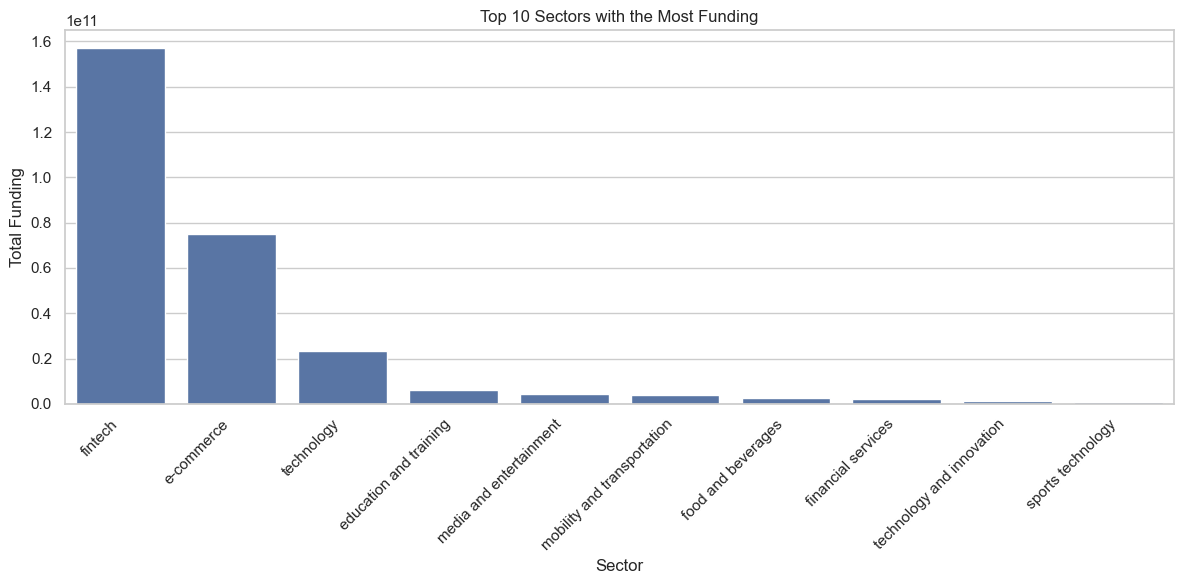

In [2361]:
# Sort the sectors based on the total funding in descending order and select the top 10
top_10_sectors = sector_funding.sort_values(ascending=False).head(10)

# Plot the top 10 sectors with the most funding using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values)
plt.xlabel('Sector')
plt.ylabel('Total Funding')
plt.title('Top 10 Sectors with the Most Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now finding the most funded category by year

In [2362]:
# Grouping the data by Year and Category, and sum the Amount for each group
funding_by_year_category = complete_data.groupby(['year', 'Category'])[
    'amount'].sum().reset_index()

# Finding the category with the maximum funding for each year
max_funding_by_year = funding_by_year_category.loc[funding_by_year_category.groupby(
    'year')['amount'].idxmax()]

# Formatting the Amount column to not use scientific notation
max_funding_by_year['amount'] = max_funding_by_year['amount'].apply(lambda x: f"{
                                                                    x:,.0f}")

max_funding_by_year

,year,Category,amount
20,2018,technology,"4,276,885,935"
39,2019,technology,"1,484,450,500"
48,2020,e-commerce,"71,666,471,800"
74,2021,fintech,"154,307,430,000"


 Key Observations

1. 2018:

   - Leading Category: Technology
   - Funding Amount: $4 billion
   - Technology dominated the funding landscape in 2018, attracting the highest investment compared to other sectors.

2. 2019:

   - Leading Category: Technology
   - Funding Amount: $1.48 billion
   - Technology continued to be the leading category in terms of funding, although the total amount was significantly lower than in 2018.

3. 2020:

   - Leading Category: E-commerce
   - Funding Amount**: $71.67 billion
   - E-commerce emerged as the most funded category in 2020, reflecting a shift in investor focus, possibly influenced by the global pandemic and increased online shopping activities.

4. 2021:
   - Leading Category**: Fintech
   - Funding Amount**: $154 billion
   - Fintech became the most funded category in 2021. This surge indicates a strong interest in real Finacial technology services, likely driven by the growing demand.


3.What is the distribution of funding amounts among start-ups (e.g., average, median, and range) each year?  

In [2363]:
# Calculate the distribution of funding amounts each year
funding_distribution = complete_data.groupby('year')['amount'].agg(
    ['mean', 'median', 'min', 'max']).reset_index()
funding_distribution['range'] = funding_distribution['max'] - \
    funding_distribution['min']

# Format the columns to not use scientific notation
funding_distribution['mean'] = funding_distribution['mean'].apply(lambda x: f"{
                                                                  x:,.2f}")
funding_distribution['median'] = funding_distribution['median'].apply(lambda x: f"{
                                                                      x:,.0f}")
funding_distribution['min'] = funding_distribution['min'].apply(lambda x: f"{
                                                                x:,.0f}")
funding_distribution['max'] = funding_distribution['max'].apply(lambda x: f"{
                                                                x:,.0f}")
funding_distribution['range'] = funding_distribution['range'].apply(lambda x: f"{
                                                                    x:,.0f}")


funding_distribution

,year,mean,median,min,max,range
0,2018,"12,626,945.20","584,000",0,"1,000,000,000","1,000,000,000"
1,2019,"37,488,013.48","5,500,000",0,"693,000,000","693,000,000"
2,2020,"85,826,937.07","1,400,000",0,"70,000,000,000","70,000,000,000"
3,2021,"148,778,504.55","2,500,000",0,"150,000,000,000","150,000,000,000"


 Observations:

- Increasing Mean Funding**: There was a significant increase in the mean funding amount from 2018 to 2021, with a  dip in 2019. 

- Expanding Funding Range**: The range of funding dramatically increased in 2021, indicating some extremely high-value investments during this year.


4.What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year?  

<Figure size 1600x1000 with 0 Axes>

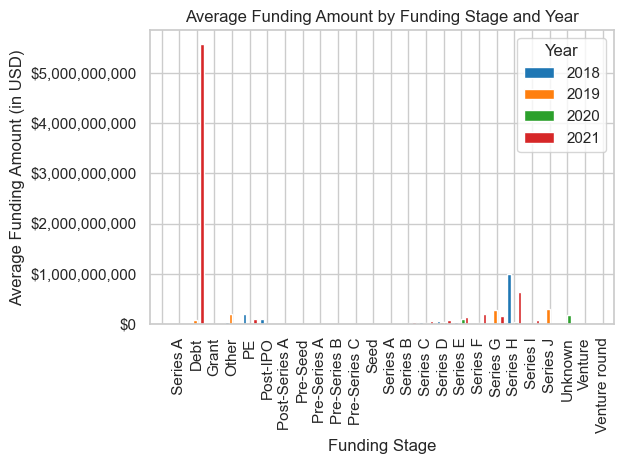

In [2364]:
# Convert 'Fund_Year' and 'Amount' columns to numeric types
complete_data['year'] = pd.to_numeric(complete_data['year'])
complete_data['amount'] = pd.to_numeric(complete_data['amount'])

# Group by 'Stage' and 'Fund_Year' and calculate the average funding amount
average_funding = complete_data.groupby(['stage', 'year'])['amount'].mean()

# Create a bar chart
plt.figure(figsize=(16, 10))  # Adjust figsize for larger visual
colors = plt.cm.tab10.colors
average_funding.unstack().plot(kind='bar', color=colors,
                               width=0.8)  # Adjust width here

# Add labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amount by Funding Stage and Year')

# Format y-axis ticks to avoid exponential notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

AVERAGE FUNDING AMOUNTS PER DIFFERENT STAGES

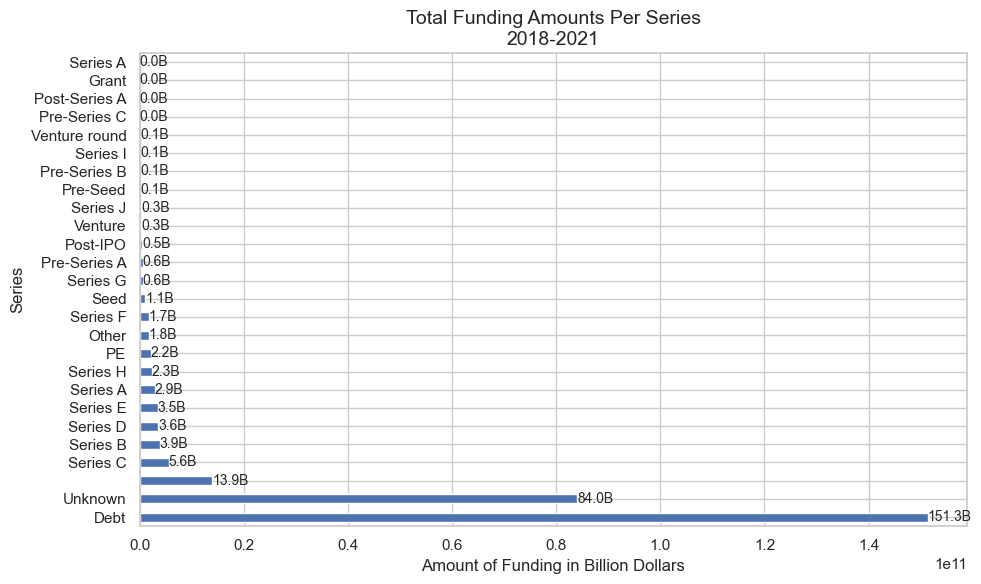

In [2365]:
stage_funding_dist = complete_data.groupby('stage')['amount'].sum().sort_values(ascending=False)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
stage_funding_dist.plot(kind='barh', ax=ax)
ax.set_title('Total Funding Amounts Per Series\n2018-2021', fontsize=14)
ax.set_xlabel('Amount of Funding in Billion Dollars', fontsize=12)
ax.set_ylabel('Series', fontsize=12)

# Annotate the bars
for i, (series, amount) in enumerate(stage_funding_dist.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

 Key Observations:

- Category 'DEBT' being the best funded stage received 151B in total
 
- A clear trend emerges – the more mature the startup, the more likely it is to attract substantial funding**


5.How does funding vary within the various geographical locations for start-ups? 

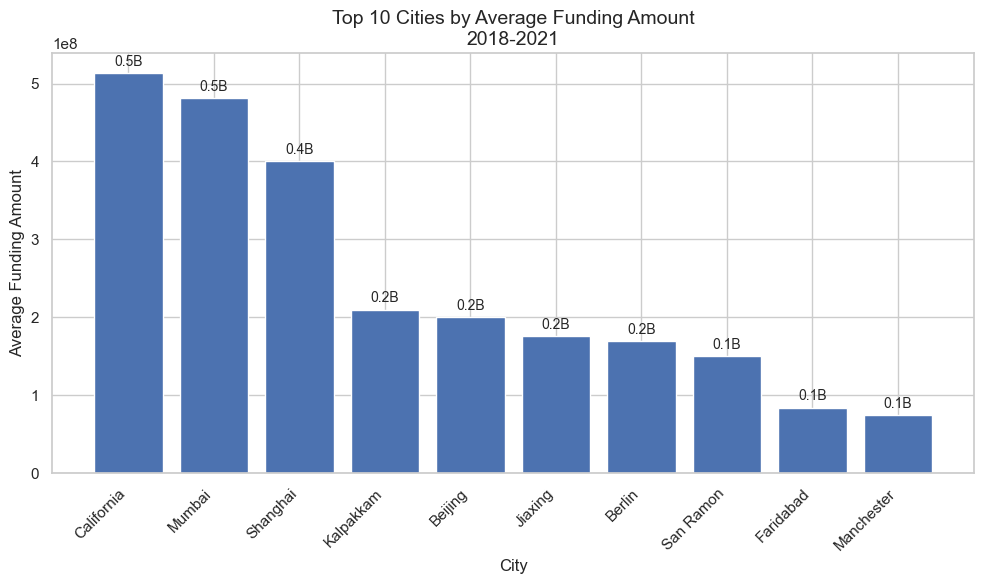

In [2366]:
# Group by 'headquarter' and calculate the mean amount
location_funding = complete_data.groupby('headquarter')['amount'].mean().reset_index()

# Sort by mean funding amount and select the top 10 cities
top_10_cities = location_funding.sort_values('amount', ascending=False).head(10)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_cities['headquarter'], top_10_cities['amount'])

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Funding Amount', fontsize=12)
plt.title('Top 10 Cities by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the mean funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height / 1e9:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

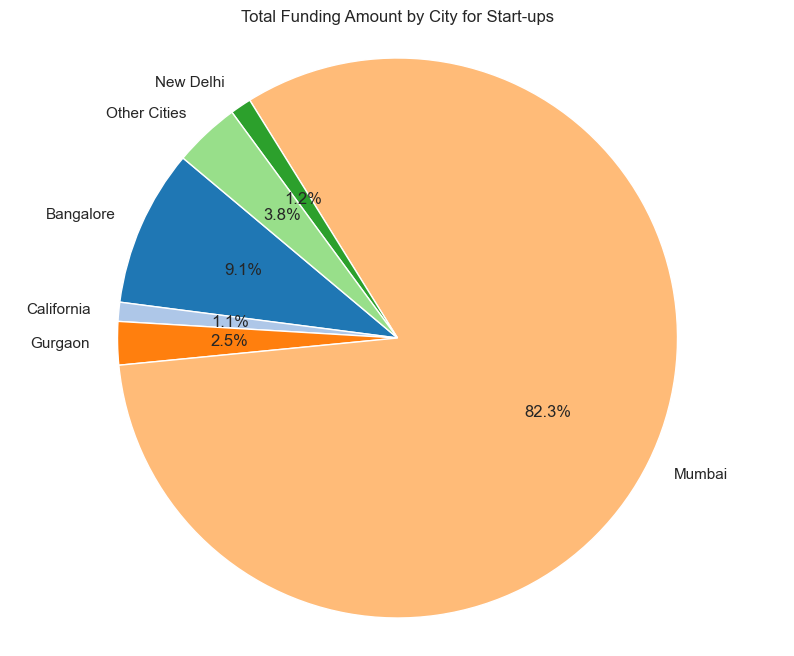

In [2367]:
# Grouping by 'HeadQuarter' and summing the 'Amount'
funding_by_location = complete_data.groupby('headquarter')['amount'].sum().reset_index()

# Calculating the total funding
total_funding = funding_by_location['amount'].sum()

# Determining the percentage contribution of each city
funding_by_location['Percentage'] = (
    funding_by_location['amount'] / total_funding) * 100

# Separating cities with more than 1% funding
significant_cities = funding_by_location[funding_by_location['Percentage'] > 1]
other_cities = funding_by_location[funding_by_location['Percentage'] <= 1]

# Summing up the funding for other cities
other_cities_funding = other_cities['amount'].sum()
other_cities_percentage = other_cities['Percentage'].sum()

# Adding 'Other Cities' to the significant cities dataframe
other_cities_row = pd.DataFrame({'headquarter': ['Other Cities'], 'amount': [
                                other_cities_funding], 'Percentage': [other_cities_percentage]})
significant_cities = pd.concat(
    [significant_cities, other_cities_row], ignore_index=True)

# Using a seaborn color palette
colors = sns.color_palette('tab20', len(significant_cities))

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(significant_cities['amount'], labels=significant_cities['headquarter'],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Funding Amount by City for Start-ups')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

 Observations:

- **Mumbai** stands out as the leading city in terms of start-up funding, receiving a substantial 82.3% of the total funding. This indicates a significant concentration of investment activities in Mumbai compared to other cities.
- **Bangalore**, known for its vibrant tech start-up community, follows with 9.1% of the funding. While substantial, it's notably lower than Mumbai, suggesting differing investor focus and possibly the sectors they invest in.
- **New Delhi** and **Gurgaon**, key players in the Northern India start-up scene, collectively account for around 3.7% of the funding, highlighting their roles but also suggesting room for growth compared to their southern counterparts.
- **Other Cities** together make up 4.9% of the total funding, indicating that while the majority of funds are concentrated in major cities, there is a spread across the country, supporting smaller hubs and diverse start-up ventures.

6.What Is The Funding Trend Over The Years

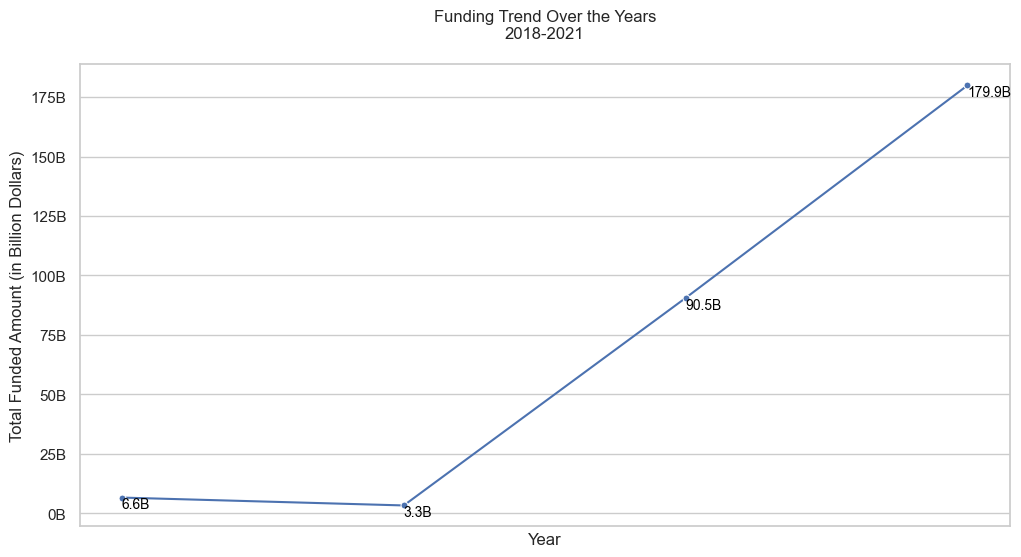

In [2368]:
# Plot a line graph to display the trend over the year
funding_trend = complete_data.groupby('year')['amount'].sum()
funding_trend = pd.DataFrame(funding_trend).reset_index()
funding_trend = funding_trend.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=funding_trend, x='year', marker='o',markersize=5, y='amount',)
plt.title('Funding Trend Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in Billion Dollars)')
plt.xticks(rotation=5)
ax.xaxis.set_major_locator(YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
for i, label in enumerate(funding_trend['amount']):
    year = funding_trend['year'].iloc[i]
    y_value = funding_trend['amount'].iloc[i]
    label_text = f'{label / 1e9:.1f}B' if not pd.isna(label) else 'N/A'
    plt.text(year, y_value, label_text, ha='left', va='top', color='black', fontsize=10)
plt.show()

 Observations  
- There was a modest decline in funding amounts between 2018 and 2019. However, from 2019 to 2021, there was a remarkable and abrupt increase, with a substantial difference of over 176 billion between the funding levels in 2019 and 2021. 
- 2021 is by far the best funded year with over 179B in funding

 **Summary and Recommendations**

 Summary
Funding Trends 
- Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
- 2021 stands out as the best-funded year, surpassing $179 billion.

Geographical Dynamics
- Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
- Notable variations across cities, with Mumbai, Bangalore, New Delhi, Gurgaon, and Others following.

Sector-Specific Insights
- fintech,ecommerce and technology sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.



 Recommendations
1. Location Consideration:  
   - Investors should focus on top-funded locations like Mumbai, Bangalore and new Delhi.  
   
2. Sector-Specific Investments:  
   - Explore opportunities in fintech and ecommerce, the most attractive sectors for investors.  
   
3. Emerging Trends: 
   - Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.  
   
4. Diversification:  
   - Diversify portfolios across locations and sectors for a balanced risk-return profile.  
